In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

import os

In [2]:
from pathlib import Path

# Configurable parts
SOURCE = "dukascopy"
SYMBOL = "usdjpy"
EVENT = '58m-dollar'
START_DATE = "2020-01-01"
END_DATE = "2024-12-31"

# Build base name
BASE_NAME = f"{SOURCE}-{SYMBOL}-tick-{START_DATE}-{END_DATE}"
RESAMPLED_NAME = f"{SOURCE}-{SYMBOL}-{EVENT}-{START_DATE}-{END_DATE}"

# Base directories
BASE_DIR = Path("../data")
RESAMPLED_DIR = BASE_DIR / "resampled"
PROCESSED_DIR = BASE_DIR / "processed"

# Final paths
RESAMPLED_FILE_PATH = RESAMPLED_DIR / f"{RESAMPLED_NAME}.pkl"
PROCESSED_FILE_PATH = PROCESSED_DIR / f"{RESAMPLED_NAME}_processed.pkl"

In [3]:
EVENT_NAME = 'cusum_filter'
DIRECTION_LABEL_DIR = BASE_DIR / "direction_labels"
DIRECTION_LABEL_DIR.mkdir(parents=True, exist_ok=True)
DIRECTION_LABEL_FILE_PATH = DIRECTION_LABEL_DIR / f"{RESAMPLED_NAME}-{EVENT_NAME}.pkl"

In [4]:
%%time
df = pd.read_pickle(PROCESSED_FILE_PATH)

CPU times: user 679 μs, sys: 79.4 ms, total: 80.1 ms
Wall time: 103 ms


In [5]:
df.shape

(1822438, 48)

In [6]:
df.head()

,open,high,low,close,volume,spread,log_volume,close_delta,close_return,close_log_return,...,hour_cos,dow,dow_sin,dow_cos,dom,dom_sin,dom_cos,month,month_sin,month_cos
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-02 03:35:29.827,108.6945,108.6995,108.6905,108.6955,533610.002041,0.002335,13.187422,0.001,0.000009,0.000009,...,0.707107,3,0.433884,-0.900969,2,0.394356,0.918958,1,0.5,0.866025
2020-01-02 03:47:19.816,108.6960,108.7135,108.6895,108.6905,533940.002441,0.002247,13.188041,-0.005,-0.000046,-0.000046,...,0.707107,3,0.433884,-0.900969,2,0.394356,0.918958,1,0.5,0.866025
2020-01-02 04:01:46.852,108.6900,108.7115,108.6870,108.7005,537560.003281,0.002303,13.194798,0.010,0.000092,0.000092,...,0.500000,3,0.433884,-0.900969,2,0.394356,0.918958,1,0.5,0.866025
2020-01-02 04:17:30.077,108.7000,108.7145,108.6990,108.7105,533880.000949,0.002420,13.187928,0.010,0.000092,0.000092,...,0.500000,3,0.433884,-0.900969,2,0.394356,0.918958,1,0.5,0.866025
2020-01-02 04:35:15.235,108.7100,108.7300,108.7080,108.7255,535220.003963,0.002204,13.190435,0.015,0.000138,0.000138,...,0.500000,3,0.433884,-0.900969,2,0.394356,0.918958,1,0.5,0.866025


In [7]:
import numpy as np

df['log_return'] = np.log(df['close'] / df['close'].shift(1))
df['log_volume'] = np.log1p(df['volume'])
df = df.dropna()

In [8]:
df.head()

,open,high,low,close,volume,spread,log_volume,close_delta,close_return,close_log_return,...,dow,dow_sin,dow_cos,dom,dom_sin,dom_cos,month,month_sin,month_cos,log_return
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-02 03:47:19.816,108.696,108.7135,108.6895,108.6905,533940.002441,0.002247,13.188041,-0.005,-0.000046,-0.000046,...,3,0.433884,-0.900969,2,0.394356,0.918958,1,0.5,0.866025,-0.000046
2020-01-02 04:01:46.852,108.690,108.7115,108.6870,108.7005,537560.003281,0.002303,13.194798,0.010,0.000092,0.000092,...,3,0.433884,-0.900969,2,0.394356,0.918958,1,0.5,0.866025,0.000092
2020-01-02 04:17:30.077,108.700,108.7145,108.6990,108.7105,533880.000949,0.002420,13.187928,0.010,0.000092,0.000092,...,3,0.433884,-0.900969,2,0.394356,0.918958,1,0.5,0.866025,0.000092
2020-01-02 04:35:15.235,108.710,108.7300,108.7080,108.7255,535220.003963,0.002204,13.190435,0.015,0.000138,0.000138,...,3,0.433884,-0.900969,2,0.394356,0.918958,1,0.5,0.866025,0.000138
2020-01-02 04:43:04.917,108.724,108.7320,108.7175,108.7195,541880.001783,0.002597,13.202802,-0.006,-0.000055,-0.000055,...,3,0.433884,-0.900969,2,0.394356,0.918958,1,0.5,0.866025,-0.000055


## Calculate Daily Volatility

In [9]:
vol = df['log_return'].rolling(window=10).std()
vol.mean()

np.float64(0.00013062097620297796)

## Get Events Start Time (t0)

In [10]:
import numpy as np
import pandas as pd
from tqdm import tqdm

def get_tevents_optimized(data: pd.Series, threshold: float) -> pd.DatetimeIndex:
    # get tEvents using CUSUM filter
    values = data.values
    timestamps = data.index

    s_pos = np.zeros_like(values)
    s_neg = np.zeros_like(values)

    t_events_mask = np.zeros_like(values, dtype=bool)

    cum_pos, cum_neg = 0.0, 0.0

    for i in tqdm(range(len(values))):
        cum_pos = max(0.0, cum_pos + values[i])
        cum_neg = min(0.0, cum_neg + values[i])
        s_pos[i] = cum_pos
        s_neg[i] = cum_neg

        if cum_pos > threshold:
            t_events_mask[i] = True
            cum_pos = 0.0
        if cum_neg < -threshold:
            t_events_mask[i] = True
            cum_neg = 0.0

    return timestamps[t_events_mask]


In [11]:
%%time

t_events = get_tevents_optimized(df['log_return'].iloc[1:], threshold=vol.mean())

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1822436/1822436 [00:00<00:00, 3440363.22it/s]

CPU times: user 535 ms, sys: 16.4 ms, total: 552 ms
Wall time: 551 ms


In [12]:
t_events

DatetimeIndex(['2020-01-02 04:17:30.077000', '2020-01-02 04:35:15.235000',
               '2020-01-02 05:04:42.580000', '2020-01-02 05:27:05.037000',
               '2020-01-02 05:46:44.205000', '2020-01-02 05:56:05.860000',
               '2020-01-02 06:52:54.354000', '2020-01-02 07:00:01.238000',
               '2020-01-02 07:08:23.181000', '2020-01-02 07:18:47.107000',
               ...
               '2024-12-30 23:08:12.101000', '2024-12-30 23:13:31.707000',
               '2024-12-30 23:17:32.270000', '2024-12-30 23:20:43.878000',
               '2024-12-30 23:32:26.048000', '2024-12-30 23:34:02.941000',
               '2024-12-30 23:38:17.708000', '2024-12-30 23:40:27.389000',
               '2024-12-30 23:46:24.916000', '2024-12-30 23:55:02.722000'],
              dtype='datetime64[ns]', name='timestamp', length=695749, freq=None)

In [13]:
df.loc[t_events]

,open,high,low,close,volume,spread,log_volume,close_delta,close_return,close_log_return,...,dow,dow_sin,dow_cos,dom,dom_sin,dom_cos,month,month_sin,month_cos,log_return
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-02 04:17:30.077,108.7000,108.7145,108.6990,108.7105,533880.000949,0.002420,13.187928,0.0100,0.000092,0.000092,...,3,0.433884,-0.900969,2,0.394356,0.918958,1,5.000000e-01,0.866025,0.000092
2020-01-02 04:35:15.235,108.7100,108.7300,108.7080,108.7255,535220.003963,0.002204,13.190435,0.0150,0.000138,0.000138,...,3,0.433884,-0.900969,2,0.394356,0.918958,1,5.000000e-01,0.866025,0.000138
2020-01-02 05:04:42.580,108.7260,108.7530,108.7260,108.7530,538020.003438,0.002691,13.195653,0.0280,0.000258,0.000257,...,3,0.433884,-0.900969,2,0.394356,0.918958,1,5.000000e-01,0.866025,0.000257
2020-01-02 05:27:05.037,108.7440,108.7465,108.7355,108.7385,534020.002484,0.002272,13.188190,-0.0050,-0.000046,-0.000046,...,3,0.433884,-0.900969,2,0.394356,0.918958,1,5.000000e-01,0.866025,-0.000046
2020-01-02 05:46:44.205,108.7395,108.7575,108.7390,108.7535,535600.001574,0.001685,13.191145,0.0145,0.000133,0.000133,...,3,0.433884,-0.900969,2,0.394356,0.918958,1,5.000000e-01,0.866025,0.000133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-30 23:34:02.941,157.0455,157.0460,156.9875,156.9875,375300.000310,0.010275,12.835484,-0.0575,-0.000366,-0.000366,...,0,0.000000,1.000000,30,-0.201299,0.979530,12,-2.449294e-16,1.000000,-0.000366
2024-12-30 23:38:17.708,156.9695,156.9970,156.9690,156.9965,369900.002599,0.012375,12.820991,0.0285,0.000182,0.000182,...,0,0.000000,1.000000,30,-0.201299,0.979530,12,-2.449294e-16,1.000000,0.000182
2024-12-30 23:40:27.389,157.0060,157.0235,157.0050,157.0235,371790.001631,0.013689,12.826087,0.0185,0.000118,0.000118,...,0,0.000000,1.000000,30,-0.201299,0.979530,12,-2.449294e-16,1.000000,0.000118


## Calculate Target Volatility (trgt)
This will be used for the calculation of dynamic TP/SL

In [14]:
def get_daily_vol(close,span0=100):
    # daily vol reindexed to close
    df0=close.index.searchsorted(close.index-pd.Timedelta(days=1))
    #bp()
    df0=df0[df0>0]
    #bp()
    df0=(pd.Series(close.index[df0-1],
                   index=close.index[close.shape[0]-df0.shape[0]:]))
    #bp()
    try:
        df0=close.loc[df0.index]/close.loc[df0.values].values-1 # daily rets
    except Exception as e:
        print(e)
        print('adjusting shape of close.loc[df0.index]')
        cut = close.loc[df0.index].shape[0] - close.loc[df0.values].shape[0]
        df0=close.loc[df0.index].iloc[:-cut]/close.loc[df0.values].values-1
    df0=df0.ewm(span=span0).std().rename('dailyVol')
    return df0

In [15]:
%%time
daily_vol = get_daily_vol(df['close'])

CPU times: user 240 ms, sys: 10.8 ms, total: 251 ms
Wall time: 250 ms


In [16]:
trgt = daily_vol.reindex(t_events, method='ffill')
trgt.describe()

count    695567.000000
mean          0.001011
std           0.000789
min           0.000070
25%           0.000567
50%           0.000820
75%           0.001203
max           0.022802
Name: dailyVol, dtype: float64

In [17]:
from ta.volatility import AverageTrueRange

def get_atr(df, window=60):
    atr = AverageTrueRange(high=df['high'], low=df['low'], close=df['close'], window=window)
    return atr.average_true_range().rename(f"atr{window}")

CPU times: user 3.08 s, sys: 62.5 ms, total: 3.15 s
Wall time: 3.15 s


<Axes: title={'center': 'ATR on Dollar Bars'}, xlabel='timestamp'>

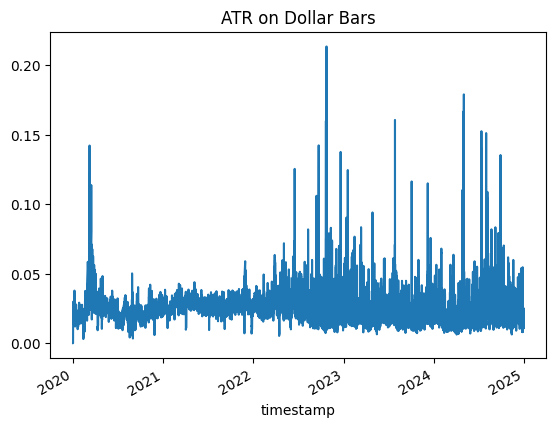

In [18]:
%%time
atr60 = get_atr(df, window=60)
atr60.describe()
atr60.plot(title='ATR on Dollar Bars')

In [19]:
trgt = atr60.reindex(t_events, method='ffill')
trgt.describe()

count    695749.000000
mean          0.027495
std           0.012719
min           0.000000
25%           0.019987
50%           0.024849
75%           0.031228
max           0.213405
Name: atr60, dtype: float64

In [20]:
def get_intraday_vol(log_return, window=60, span=60):
    rolling_std = log_return.rolling(window=window).std()
    smoothed_vol = rolling_std.ewm(span=span).mean()
    return smoothed_vol.rename(f'intraday_vol_{window}_{span}')

In [21]:
intraday_vol = get_intraday_vol(df['log_return'], window=60, span=60)

In [22]:
trgt = intraday_vol.reindex(t_events, method='ffill')
trgt.describe()

count    695730.000000
mean          0.000156
std           0.000085
min           0.000012
25%           0.000107
50%           0.000138
75%           0.000179
max           0.001586
Name: intraday_vol_60_60, dtype: float64

## Apply Triple Barrier
We use daily volatility to calculate TP/SL, and we set our T1 as 1day

In [23]:
from concurrent.futures import ThreadPoolExecutor
import numpy as np
import pandas as pd

def applyPtSlOnT1(close,events,ptSl,molecule):
    # apply stop loss/profit taking, if it takes place before t1 (end of event)
    events_=events.loc[molecule]
    out=events_[['t1']].copy(deep=True)
    
    pt = ptSl[0] * events_['trgt'] if ptSl[0] > 0 else pd.Series(index=events.index)
    sl = -ptSl[1] * events_['trgt'] if ptSl[1] > 0 else pd.Series(index=events.index)

        
    for loc, t1 in events_['t1'].fillna(close.index[-1]).items():
        df0=close[loc:t1] # path prices
        df0=(df0/close[loc]-1)*events_.at[loc,'side'] # path returns
        out.loc[loc,'sl']=df0[df0<sl[loc]].index.min() # earliest stop loss
        out.loc[loc,'pt']=df0[df0>pt[loc]].index.min() # earliest profit taking
        
    return out


def parallel_apply(func, items, num_threads=4, **kwargs):
    
    def worker(molecule):
        return func(molecule=molecule, **kwargs)

    chunks = np.array_split(items, num_threads)
    
    with ThreadPoolExecutor(max_workers=num_threads) as executor:
        results = list(executor.map(worker, chunks))

    return pd.concat(results).sort_index()


def getEvents(close, tEvents, ptSl, trgt, minRet, numThreads=4, t1=False, side=None):
    # Step 1: Filter targets
    trgt = trgt.loc[tEvents]
    trgt = trgt[trgt > minRet]

    # Step 2: Set vertical barrier (t1)
    if t1 is False:
        t1 = pd.Series(pd.NaT, index=tEvents)

    # Step 3: Build events DataFrame
    if side is None:
        side_, ptSl_ = pd.Series(1., index=trgt.index), [ptSl[0], ptSl[0]]
    else:
        side_, ptSl_ = side.loc[trgt.index], ptSl[:2]

    events = pd.concat({'t1': t1, 'trgt': trgt, 'side': side_}, axis=1).dropna(subset=['trgt'])

    # Step 4: Apply barriers in parallel
    df0 = parallel_apply(
        func=applyPtSlOnT1,
        items=events.index,
        num_threads=numThreads,
        close=close,
        events=events,
        ptSl=ptSl_
    )

    # Step 5: Choose the first touched barrier
    events['t1'] = df0.dropna(how='all').min(axis=1)
    
    if side is None:
        events = events.drop('side', axis=1)
        
    return events


In [24]:
def get_vertical_barrier(t_events, close, delta=pd.Timedelta(minutes=60)):
    """
    For each event in t_events, find the timestamp in close.index 
    that is at least delta later. Returns a pd.Series of t1.
    """
    barrier_times = t_events + delta
    t1_idx = close.index.searchsorted(barrier_times)
    valid_idx = t1_idx[t1_idx < len(close)]
    t1 = pd.Series(close.index[valid_idx], index=t_events[:len(valid_idx)])
    return t1

In [25]:
t1 = get_vertical_barrier(t_events, df['close'], delta=pd.Timedelta(minutes=120))

In [26]:
t1

timestamp
2020-01-02 04:17:30.077   2020-01-02 06:24:39.590
2020-01-02 04:35:15.235   2020-01-02 06:52:54.354
2020-01-02 05:04:42.580   2020-01-02 07:05:04.502
2020-01-02 05:27:05.037   2020-01-02 07:27:43.455
2020-01-02 05:46:44.205   2020-01-02 07:51:34.975
                                    ...          
2024-12-30 21:28:30.772   2024-12-30 23:29:32.470
2024-12-30 21:30:49.486   2024-12-30 23:30:56.788
2024-12-30 21:46:12.738   2024-12-30 23:46:24.916
2024-12-30 21:53:49.393   2024-12-30 23:55:02.722
2024-12-30 21:58:00.246   2024-12-30 23:58:40.072
Name: timestamp, Length: 695735, dtype: datetime64[ns]

## Calculate minRet

In [27]:
min_ret = 0.5 * intraday_vol.median()
min_ret

np.float64(6.103413746540666e-05)

In [28]:
%%time

events = getEvents(
    df['close'],
    tEvents=t_events, 
    ptSl=[1,1], 
    trgt=trgt, 
    minRet=0, 
    numThreads=16, 
    t1=t1, 
    side=None
)

CPU times: user 3min 32s, sys: 22.3 s, total: 3min 54s
Wall time: 3min 33s


In [29]:
events

,t1,trgt
timestamp,,
2020-01-02 09:13:26.928,2020-01-02 09:39:45.692,0.000094
2020-01-02 09:39:45.692,2020-01-02 10:02:09.112,0.000093
2020-01-02 10:02:09.112,2020-01-02 10:16:10.712,0.000092
2020-01-02 10:16:10.712,2020-01-02 10:22:11.307,0.000091
2020-01-02 10:22:11.307,2020-01-02 10:26:46.852,0.000091
...,...,...
2024-12-30 23:34:02.941,2024-12-30 23:36:13.794,0.000088
2024-12-30 23:38:17.708,2024-12-30 23:40:27.389,0.000092
2024-12-30 23:40:27.389,2024-12-30 23:46:24.916,0.000094


In [30]:
events

,t1,trgt
timestamp,,
2020-01-02 09:13:26.928,2020-01-02 09:39:45.692,0.000094
2020-01-02 09:39:45.692,2020-01-02 10:02:09.112,0.000093
2020-01-02 10:02:09.112,2020-01-02 10:16:10.712,0.000092
2020-01-02 10:16:10.712,2020-01-02 10:22:11.307,0.000091
2020-01-02 10:22:11.307,2020-01-02 10:26:46.852,0.000091
...,...,...
2024-12-30 23:34:02.941,2024-12-30 23:36:13.794,0.000088
2024-12-30 23:38:17.708,2024-12-30 23:40:27.389,0.000092
2024-12-30 23:40:27.389,2024-12-30 23:46:24.916,0.000094


In [31]:
events['duration'] = events['t1'] - events.index
events['duration'].describe()

count                       695729
mean     0 days 00:04:33.717730934
std      0 days 01:00:48.303334928
min         0 days 00:00:00.558000
25%         0 days 00:00:37.963000
50%         0 days 00:01:24.479000
75%         0 days 00:03:14.837000
max         3 days 00:36:23.767000
Name: duration, dtype: object

In [32]:
longest_idx = events['duration'].idxmax()
longest_event = events.loc[longest_idx]
print(f"Longest event index: {longest_idx}")
print(longest_event)

Longest event index: 2020-12-31 21:59:37.920000
t1          2021-01-03 22:36:01.687000
trgt                           0.00021
duration        3 days 00:36:23.767000
Name: 2020-12-31 21:59:37.920000, dtype: object


# Keep only intraday events

In [33]:
events = events[events.index.date==events.t1.dt.date]

## Create classification labels

In [34]:
def getBins(events, close, t1=None):
    '''
    Compute event's outcome (including side information, if provided).
    events is a DataFrame where:
    -events.index is event's starttime
    -events['t1'] is event's endtime
    -events['trgt'] is event's target
    -events['side'] (optional) implies the algo's position side
    -t1 is original vertical barrier series
    Case 1: ('side' not in events): bin in (-1,1) <-label by price action
    Case 2: ('side' in events): bin in (0,1) <-label by pnl (meta-labeling)
    '''
    # 1) prices aligned with events
    events_ = events.dropna(subset=['t1'])
    px = events_.index.union(events_['t1'].values).drop_duplicates()
    px = close.reindex(px, method='bfill')
    # 2) create out object
    out = pd.DataFrame(index=events_.index)
    out['ret'] = px.loc[events_['t1'].values].values / px.loc[
        events_.index] - 1
    if 'side' in events_: out['ret'] *= events_['side']  # meta-labeling
    out['bin'] = np.sign(out['ret'])

    if 'side' not in events_:
        # only applies when not meta-labeling.
        # to update bin to 0 when vertical barrier is touched, we need the
        # original vertical barrier series since the events['t1'] is the time
        # of first touch of any barrier and not the vertical barrier
        # specifically. The index of the intersection of the vertical barrier
        # values and the events['t1'] values indicate which bin labels needs
        # to be turned to 0.
        vtouch_first_idx = events[events['t1'].isin(t1.values)].index
        out.loc[vtouch_first_idx, 'bin'] = 0.

    if 'side' in events_: out.loc[out['ret'] <= 0, 'bin'] = 0  # meta-labeling
    return out

In [35]:
labels = getBins(events, df['close'], t1=t1)
labels["bin_class"] = labels["bin"] + 1
labels

,ret,bin,bin_class
timestamp,,,
2020-01-02 09:13:26.928,0.000156,1.0,2.0
2020-01-02 09:39:45.692,0.000207,0.0,1.0
2020-01-02 10:02:09.112,-0.000124,-1.0,0.0
2020-01-02 10:16:10.712,0.000152,0.0,1.0
2020-01-02 10:22:11.307,-0.000147,0.0,1.0
...,...,...,...
2024-12-30 23:32:26.048,-0.000366,-1.0,0.0
2024-12-30 23:34:02.941,-0.000096,-1.0,0.0
2024-12-30 23:38:17.708,0.000172,1.0,2.0


In [36]:
labels.bin.value_counts()

bin
 1.0    235525
-1.0    230853
 0.0    227364
Name: count, dtype: int64

In [37]:
labeled_events = events.join(labels, how='inner')

In [38]:
labeled_events.head()

,t1,trgt,duration,ret,bin,bin_class
timestamp,,,,,,
2020-01-02 09:13:26.928,2020-01-02 09:39:45.692,0.000094,0 days 00:26:18.764000,0.000156,1.0,2.0
2020-01-02 09:39:45.692,2020-01-02 10:02:09.112,0.000093,0 days 00:22:23.420000,0.000207,0.0,1.0
2020-01-02 10:02:09.112,2020-01-02 10:16:10.712,0.000092,0 days 00:14:01.600000,-0.000124,-1.0,0.0
2020-01-02 10:16:10.712,2020-01-02 10:22:11.307,0.000091,0 days 00:06:00.595000,0.000152,0.0,1.0
2020-01-02 10:22:11.307,2020-01-02 10:26:46.852,0.000091,0 days 00:04:35.545000,-0.000147,0.0,1.0


In [39]:
df.loc[labeled_events.index]

,open,high,low,close,volume,spread,log_volume,close_delta,close_return,close_log_return,...,dow,dow_sin,dow_cos,dom,dom_sin,dom_cos,month,month_sin,month_cos,log_return
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-02 09:13:26.928,108.7910,108.8120,108.7885,108.8095,536549.999118,0.001848,13.192917,0.0190,0.000175,0.000175,...,3,0.433884,-0.900969,2,0.394356,0.918958,1,5.000000e-01,0.866025,0.000175
2020-01-02 09:39:45.692,108.8140,108.8325,108.8130,108.8265,533450.001240,0.002160,13.187123,0.0125,0.000115,0.000115,...,3,0.433884,-0.900969,2,0.394356,0.918958,1,5.000000e-01,0.866025,0.000115
2020-01-02 10:02:09.112,108.8365,108.8530,108.8320,108.8490,535369.998693,0.002293,13.190715,0.0130,0.000119,0.000119,...,3,0.433884,-0.900969,2,0.394356,0.918958,1,5.000000e-01,0.866025,0.000119
2020-01-02 10:16:10.712,108.8470,108.8475,108.8325,108.8355,534630.002499,0.002233,13.189332,-0.0120,-0.000110,-0.000110,...,3,0.433884,-0.900969,2,0.394356,0.918958,1,5.000000e-01,0.866025,-0.000110
2020-01-02 10:22:11.307,108.8350,108.8520,108.8340,108.8520,533779.998541,0.001964,13.187741,0.0165,0.000152,0.000152,...,3,0.433884,-0.900969,2,0.394356,0.918958,1,5.000000e-01,0.866025,0.000152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-30 23:32:26.048,157.0300,157.0520,157.0205,157.0450,370270.000219,0.011216,12.821990,0.0155,0.000099,0.000099,...,0,0.000000,1.000000,30,-0.201299,0.979530,12,-2.449294e-16,1.000000,0.000099
2024-12-30 23:34:02.941,157.0455,157.0460,156.9875,156.9875,375300.000310,0.010275,12.835484,-0.0575,-0.000366,-0.000366,...,0,0.000000,1.000000,30,-0.201299,0.979530,12,-2.449294e-16,1.000000,-0.000366
2024-12-30 23:38:17.708,156.9695,156.9970,156.9690,156.9965,369900.002599,0.012375,12.820991,0.0285,0.000182,0.000182,...,0,0.000000,1.000000,30,-0.201299,0.979530,12,-2.449294e-16,1.000000,0.000182


## Calculate Concurrency

In [40]:
def get_concurrency(events, price_index):
    """
    Calculate concurrency: number of overlapping events at each time.
    
    Args:
        events (pd.DataFrame): Must have 't1' column with index as start time.
        price_index (pd.DatetimeIndex): Full time index (e.g., from your OHLCV data).
        
    Returns:
        pd.Series: concurrency count indexed by time.
    """
    concurrency = pd.Series(0, index=price_index)

    for start, end in events['t1'].items():
        concurrency[start:end] += 1

    return concurrency


In [41]:
# Let's say your OHLCV data or close series has this index
price_index = df.index  # or df_ohlcv.index

concurrency = get_concurrency(events=labeled_events, price_index=price_index)

(array([1.765199e+06, 5.402300e+04, 2.064000e+03, 7.350000e+02,
        2.100000e+02, 1.280000e+02, 2.500000e+01, 2.900000e+01,
        1.000000e+01, 1.400000e+01]),
 array([ 0. ,  3.6,  7.2, 10.8, 14.4, 18. , 21.6, 25.2, 28.8, 32.4, 36. ]),
 <BarContainer object of 10 artists>)

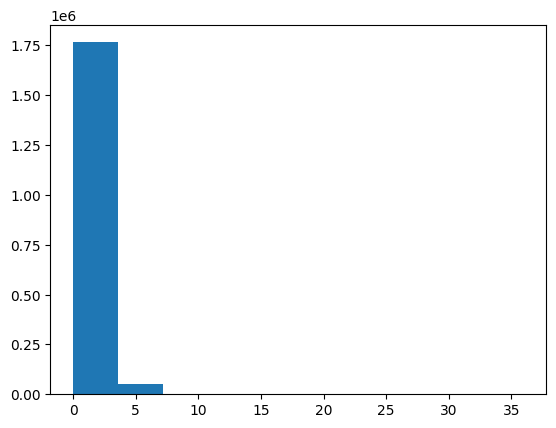

In [42]:
plt.hist(concurrency)

## Save events to disk

In [43]:
labeled_events.to_pickle(DIRECTION_LABEL_FILE_PATH)